In [9]:
import numpy as np 

np.random.seed(1)                          # for fixing random values

# randomly generate data 
N = 2 # number of training sample 
d = 2 # data dimension 
C = 3 # number of classes 

X = np.random.randn(d, N)
y = np.random.randint(0, 3, (N,))

In [10]:
from scipy import sparse 
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

Y = convert_labels(y, C)
print(y)
print(Y)

[2 1]
[[0 0]
 [0 1]
 [1 0]]


In [12]:
#viết hàm softmax
def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

# cost or loss function  
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

W_init = np.random.randn(d, C)

def grad(X, Y, W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return X.dot(E.T)
    
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 
g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init, cost)

print(np.linalg.norm(g1 - g2))

2.704792955908303e-10


In [13]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]    
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = .05 
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X, y, W_init, eta)
print(W[-1])

[[ 0.40640726 -2.33875688  4.28800762]
 [ 2.40173239 -2.48355727  0.42496937]]


In [14]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [15]:
#set data
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500 #500 điểm 1 class -> 3 class có 1500 điểm (T=1->1500)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0).T # each column is a datapoint
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [16]:
import matplotlib.pyplot as plt
def display(X, label):
#     K = np.amax(label) + 1
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1, :], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize = 4, alpha = .8)

#     plt.axis('equal')
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)


<Figure size 640x480 with 1 Axes>

In [17]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 7.95819763 -4.03893973 -4.21902437]
 [ 0.23743917  2.95280664  0.40718706]
 [-1.07291526 -1.42866515  1.56477536]]


In [18]:
#Visualize 
# x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
# x_min, x_max = -4, 14
# y_min, y_max = -4, 14

xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)


print(XX.shape)

Z = pred(W[-1], XX)

(1, 270400)
(3, 270400)


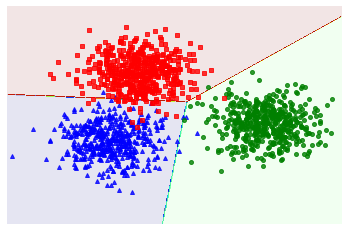

<Figure size 432x288 with 0 Axes>

In [19]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.figure(1
# plt.pcolormesh(xx, yy, Z, cmap='jet', alpha = .35)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()